In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
log_data = json.load(open('../results/log_11.json'))

In [3]:
print(f"This simulation used {log_data['total_tokens_input']} input tokens, from which {log_data['total_tokens_cached']} cached.")
print(f"This simulation used {log_data['total_tokens_output']} output tokens.")
print(f"The predicted total costs are €{log_data['predicted_cost']}")

This simulation used 2936553 input tokens, from which 0 cached.
This simulation used 140547 output tokens.
The predicted total costs are €0.52481115


([<matplotlib.patches.Wedge at 0x77617ca3dba0>,
 [Text(0.37261175878219294, 1.0349688291041625, 'Joe Biden'),
  Text(-1.0805159935559854, -0.2061193529723058, "Didn't vote"),
  Text(0.5599455183205809, -0.9468162527717277, 'Donald Trump')],
 [Text(0.2032427775175598, 0.564528452238634, '39.0%'),
  Text(-0.5893723601214464, -0.11242873798489406, '28.0%'),
  Text(0.30542482817486233, -0.5164452287845787, '33.0%')])

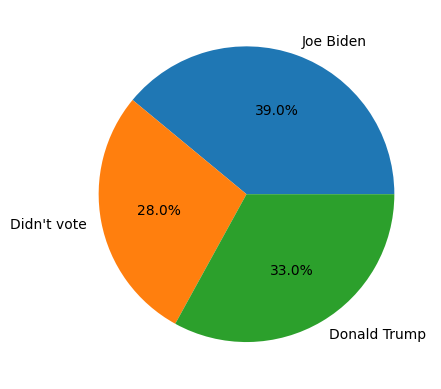

In [4]:
user_voted_for = [user['persona']['voted2020_for'] if 'voted2020_for' in user['persona'] else "Didn't vote" for user in log_data['users']]

plt.pie(Counter(user_voted_for).values(), labels=Counter(user_voted_for).keys(), autopct='%1.1f%%')

(array([10.,  8., 20.,  5.,  2., 15.,  7., 13.,  4., 16.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

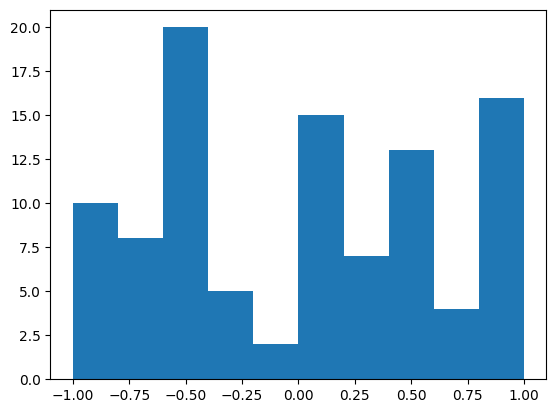

In [5]:
user_partisans = [user['persona']['partisan'] for user in log_data['users']]

plt.hist(user_partisans, bins=10)

([<matplotlib.patches.Wedge at 0x77617a9db550>,
 [Text(-0.6182917088228987, 0.90978863633311, 'White'),
  Text(0.06906955709217517, -1.097829402176445, 'Black'),
  Text(0.8251221670583664, -0.7274430626715094, 'Hispanic'),
  Text(1.0654414723751324, -0.27355889483456786, 'Asian'),
  Text(1.095118158858421, -0.10351916797647852, 'Multiple races'),
  Text(1.0994572156178228, -0.03455185994855542, '')],
 [Text(-0.33725002299430834, 0.49624834709078725, '69.0%'),
  Text(0.037674303868459186, -0.5988160375507882, '14.0%'),
  Text(0.4500666365772907, -0.3967871250935506, '11.0%'),
  Text(0.5811498940227995, -0.149213942637037, '4.0%'),
  Text(0.5973371775591386, -0.05646500071444282, '1.0%'),
  Text(0.5997039357915396, -0.018846469062848408, '1.0%')])

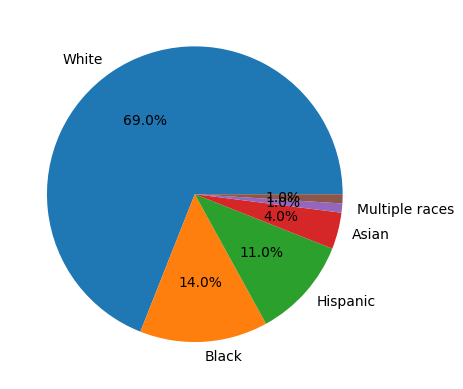

In [6]:
user_race = [user['persona']['race'] for user in log_data['users']]

plt.pie(Counter(user_race).values(), labels=Counter(user_race).keys(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x77617a833d00>,
 [Text(0.17207795223283864, 1.086457168210212, 'Democrat'),
  Text(-0.46835726917914405, -0.9953097349102213, 'Republican'),
  Text(1.056323050796661, -0.306890228511165, 'Non-partisan')],
 [Text(0.09386070121791197, 0.5926130008419338, '45.0%'),
  Text(-0.25546760137044217, -0.5428962190419389, '46.0%'),
  Text(0.5761762095254513, -0.16739467009699907, '9.0%')])

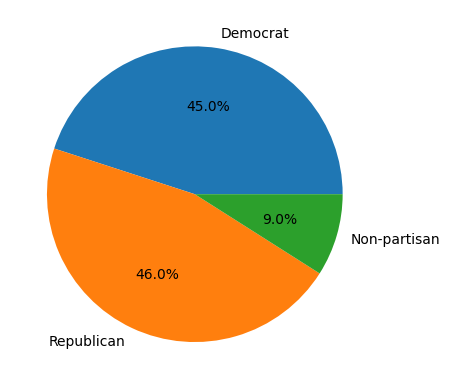

In [7]:
user_party = [user['persona']['party'] for user in log_data['users']]

plt.pie(Counter(user_party).values(), labels=Counter(user_party).keys(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x73b949ba7400>,
 [Text(0.4993895680663529, 0.9801071672559597, 'None'),
  Text(-0.9468162003458401, 0.5599456069679145, 'slightly liberal'),
  Text(-1.0095301152477212, -0.4368626173156991, 'conservative'),
  Text(-0.5299290983695926, -0.9639373167904597, 'extremely liberal'),
  Text(-0.2735589447114829, -1.065441459568915, 'extremely conservative'),
  Text(0.5299289855566827, -0.9639373788098817, 'liberal'),
  Text(1.0735084266747321, -0.2399576167958453, 'slightly conservative')],
 [Text(0.27239430985437424, 0.5346039094123416, '35.0%'),
  Text(-0.51644520018864, 0.3054248765279533, '13.0%'),
  Text(-0.5506527901351206, -0.23828870035401767, '17.0%'),
  Text(-0.2890522354743232, -0.5257839909766143, '4.0%'),
  Text(-0.149213969842627, -0.58114988703759, '4.0%'),
  Text(0.28905217394000865, -0.52578402480539, '20.0%'),
  Text(0.5855500509134901, -0.13088597279773379, '7.0%')])

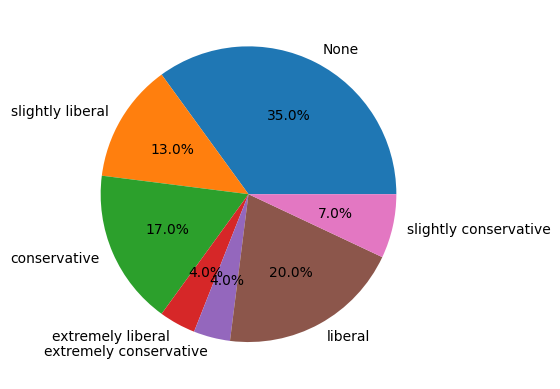

In [12]:
user_liberal_conservative = [user['persona']['liberalConservative'] if user['persona']['liberalConservative'] else 'None' for user in log_data['users']]

plt.pie(Counter(user_liberal_conservative).values(), labels=Counter(user_liberal_conservative).keys(), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x77617a8970d0>,
 [Text(1.0923370809669406, 0.12961366264643465, 'Environment'),
  Text(1.031672826598775, 0.38164273720024394, 'The media'),
  Text(0.16822743492006506, 1.087060039804709, 'Health care'),
  Text(-0.9279243754575263, 0.5907252774613255, 'Health'),
  Text(-1.0403989305050436, 0.3571695191417677, 'Economics'),
  Text(-1.088971024274554, 0.15537730944519787, 'Politicians'),
  Text(-1.0403990005213297, -0.3571693151912944, 'Unity /division'),
  Text(-0.7256873648154252, -0.8266667094707782, 'Race relations'),
  Text(-0.4889436144319481, -0.9853599047587752, 'Justice'),
  Text(-0.3200901558805092, -1.0523983523877218, 'The economy'),
  Text(-0.1682274571839823, -1.0870600363592673, 'Economic inequality'),
  Text(0.01299114549582931, -1.0999232837515107, 'Employment'),
  Text(0.19385538359914756, -1.0827834918623518, 'Corporate Corruption'),
  Text(0.24477292828941186, -1.0724207260103782, 'Housing'),
  Text(0.4418648759057551, -1.00735069933007

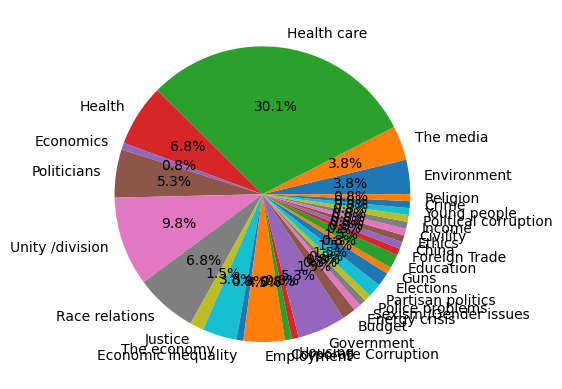

In [8]:
all_problems = []

for user in log_data['users']:
    all_problems.extend(user['persona']['importantProblems'])

plt.pie(Counter(all_problems).values(), labels=Counter(all_problems).keys(), autopct='%1.1f%%')

<BarContainer object of 100 artists>

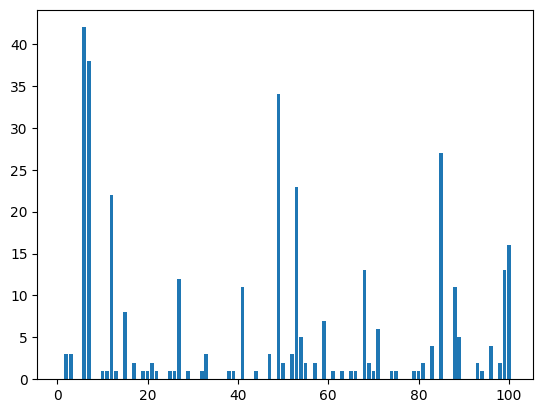

In [9]:
user_ids = [user['identifier'] for user in log_data['users']]
user_followers = [user['followers'] for user in log_data['users']]

plt.bar(user_ids, user_followers)

[37, 35, 33, 33, 21, 19, 18, 18, 17, 16, 16, 14, 13, 13, 13, 12, 12, 12, 11, 11, 11, 10, 9, 9, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<BarContainer object of 720 artists>

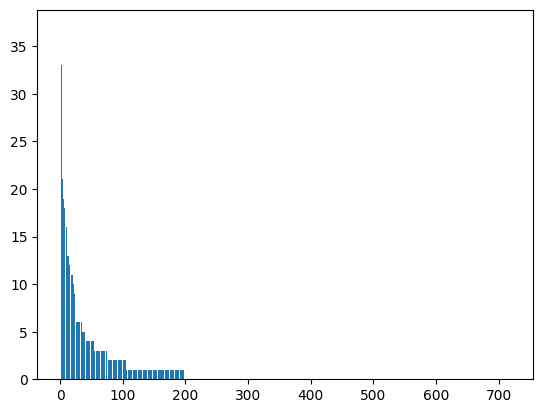

In [10]:
# TODO: for posts

posts_sorted = sorted(log_data['raw_posts'], key=lambda x: x['reposts'], reverse=True)
print([post['reposts'] for post in posts_sorted])
post_ids = [post['post_id'] for post in posts_sorted]
post_reposters = [post['reposts'] for post in posts_sorted]

plt.bar(range(len(post_reposters)), post_reposters)

<BarContainer object of 100 artists>

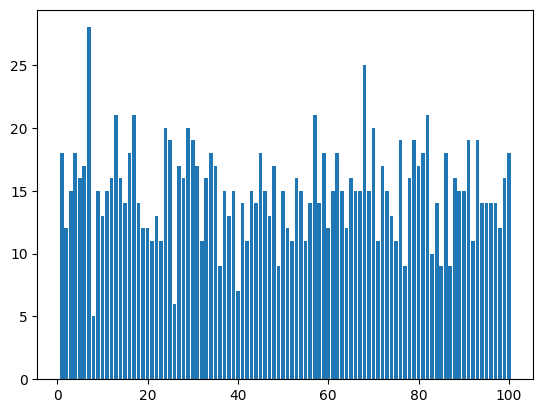

In [11]:
user_action_count = Counter([action['user_id'] for action in log_data['actions']])

plt.bar(user_action_count.keys(), user_action_count.values())

Counter({1: 780, 2: 720})


<BarContainer object of 2 artists>

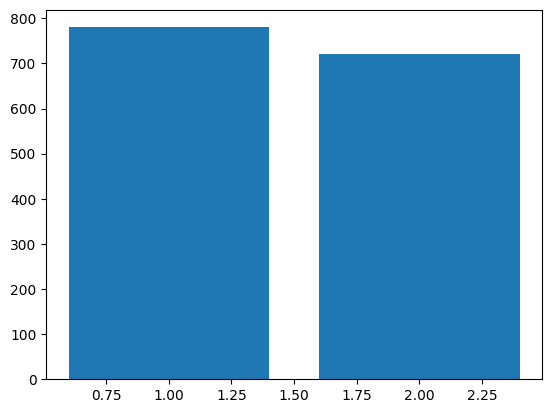

In [12]:
action_count = Counter([action['action'] for action in log_data['actions']])

print(action_count)

plt.bar(action_count.keys(), action_count.values())

In [13]:
failed_actions = [action for action in log_data['actions'] if action['success'] == False ]

print(f"Nr of failed actions: {len(failed_actions)}")
action_nr = 0

print(failed_actions[action_nr]['action'])
print(failed_actions[action_nr]['content'])
print(failed_actions[action_nr]['user_id'])
print(failed_actions[action_nr]['prompt'])

Nr of failed actions: 0


IndexError: list index out of range

In [14]:
def show_persona(user_id, log_data):

    user = [user for user in log_data['users'] if user['identifier'] == user_id][0]

    return user['persona']['persona']

def show_repost_reason(user_id, post_id, log_data):

    actions = [action for action in log_data['actions'] if action['user_id'] == user_id and action['action'] == 1]
    action = [action for action in actions if int(action['content']) == post_id][0]

    return action['explanation']

In [15]:
for post in log_data['raw_posts']:

    if post['reposters']:
        print(post['content'], '\n')

        for reposter in post['reposters']:

            print(show_persona(reposter, log_data), '\n')

            print(show_repost_reason(reposter, post['post_id'], log_data))

        print()


Disapproval of Trump is climbing, and honestly, it couldn't come soon enough. Now we need to keep that momentum going and push for real unity in this country! It's all about moving forward together, not looking back at his chaos. 

You are male.
You are divorced.
You are low income.
Age: 76.
You are Catholic.
You are from Florida.
Education: Graduate degree.
You are Hispanic.
You are heterosexual.
You voted for Joe Biden in 2020.
You are a strong Democrat.
You love Democrats, Christians, Police, scientists, Anthony Fauci, and NATO.
You hate Donald Trump, NRA, Christian Fundamentalists, and socialists.
You think the most important problems facing the country are Race relations, and Sexism /Gender issues.
Your occupation is Consultant.
You like Volunteer coaching for youth sports, Photography, and Fishing.
 

This post resonates with my strong disapproval of Trump and my belief in unity moving forward.
You are female.
You are never married.
You are low income.
Age: 27.
You are Christian.

IndexError: list index out of range

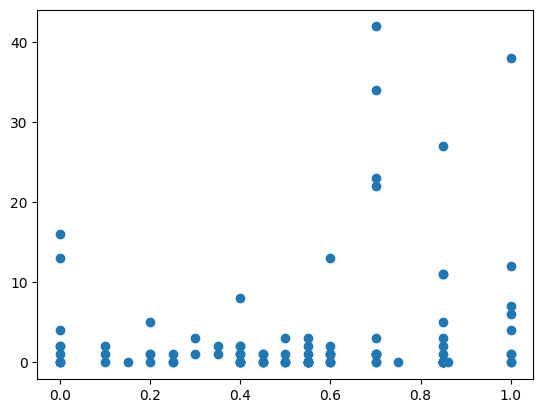

In [16]:
partisans = [abs(user['persona']['partisan']) for user in log_data['users']]
followers = [user['followers'] for user in log_data['users']]
total_retweets_user = [sum([post['reposts'] for post in log_data['raw_posts'] if post['author'] == user['identifier']]) for user in log_data['users']]

plt.scatter(partisans, followers)

In [24]:
# Correlation between partisanship and followers
import pandas as pd

df = pd.DataFrame({'partisans': partisans, 'followers': followers, 'total_retweets_user': total_retweets_user})

df.corr()

,partisans,followers,total_retweets_user
partisans,1.000000,0.187849,0.173312
followers,0.187849,1.000000,0.962572
total_retweets_user,0.173312,0.962572,1.000000


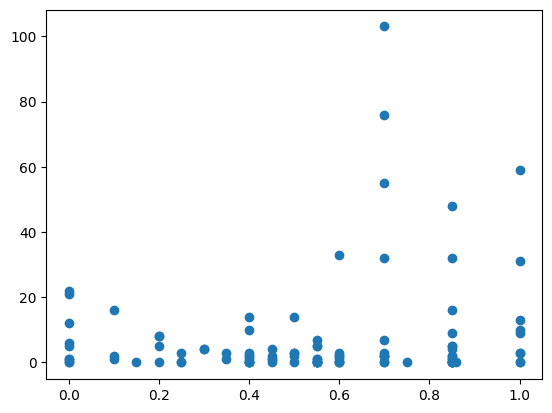

In [20]:
plt.scatter(partisans, total_retweets_user)

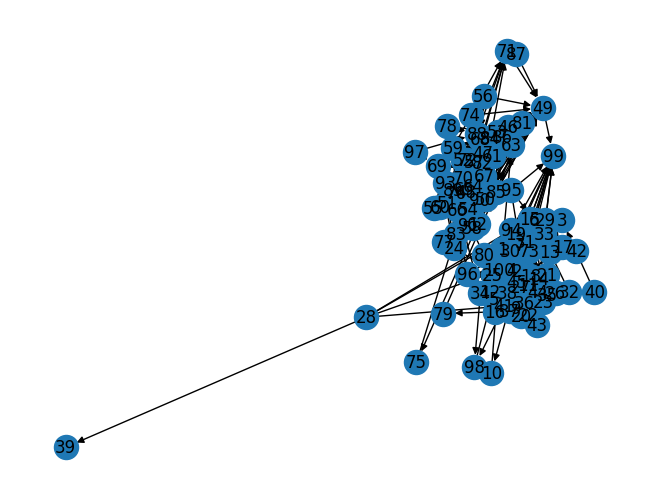

In [25]:
# Degree distribution
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(log_data['user_links'])

nx.draw(G, with_labels=True)

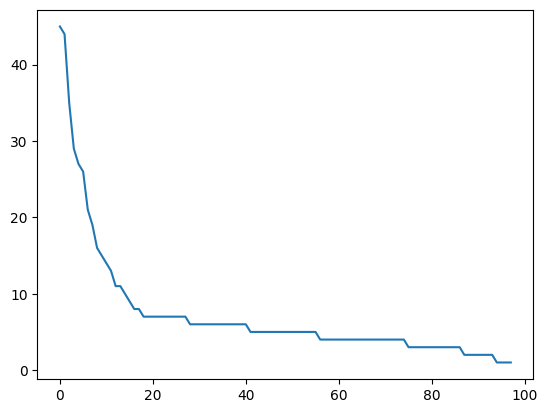

In [26]:
G.degree()

plt.plot(sorted([d for n, d in G.degree()], reverse=True))

<BarContainer object of 98 artists>

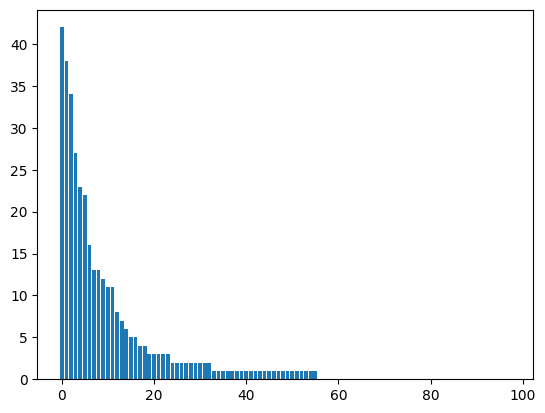

In [27]:
plt.bar(range(len(G.in_degree())), sorted([d for n, d in G.in_degree()], reverse=True))

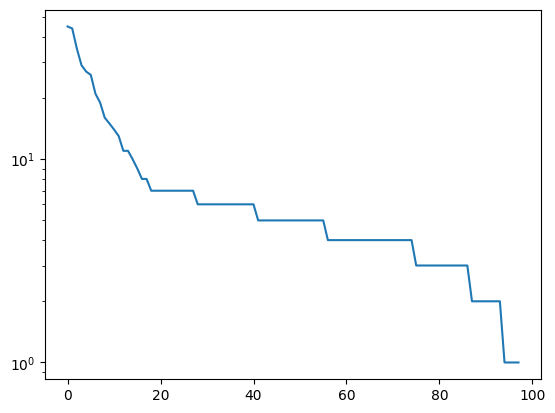

In [28]:
line, = plt.plot(sorted([d for n, d in G.degree()], reverse=True))
plt.yscale('log')


plt.show()

In [29]:
# Label propagation
import random

# Initialize nodes and neighbors
nodes = {
    user['identifier']: {
        'label': user['identifier'],
    'neighbors': [link[1] for link in log_data['user_links'] if user['identifier'] == link[0]]
} for user in log_data['users']}

t = 1

while True:

    change = False

    random_order_nodes = random.sample(list(nodes.keys()), len(nodes.keys()))
    
    for node in random_order_nodes:
        
        neighbors_labels = [nodes[neighbor]['label'] for neighbor in nodes[node]['neighbors']]
        
        if neighbors_labels:
            
            # Get the most common label
            counter = Counter(neighbors_labels)
            max_count = counter.most_common(1)[0][1]
            most_common_labels = [label for label, count in counter.items() if count == max_count]

            new_label = random.choice(most_common_labels)

            if new_label != nodes[node]['label']:
                nodes[node]['label'] = new_label
                change = True
    
    if not change:
        break

print(nodes)
print(Counter([node['label'] for node in nodes.values()]))

{1: {'label': 12, 'neighbors': [63, 100, 41, 6, 11, 7]}, 2: {'label': 12, 'neighbors': [15, 6, 7, 12]}, 3: {'label': 12, 'neighbors': [6, 7]}, 4: {'label': 12, 'neighbors': [41, 15, 100, 27, 6, 7, 19]}, 5: {'label': 12, 'neighbors': [7, 100, 96, 6]}, 6: {'label': 12, 'neighbors': [99, 7, 12]}, 7: {'label': 12, 'neighbors': [41, 15, 100, 6, 99, 12]}, 8: {'label': 8, 'neighbors': []}, 9: {'label': 12, 'neighbors': [6, 27, 7, 12]}, 10: {'label': 12, 'neighbors': [100]}, 11: {'label': 12, 'neighbors': [33, 27, 6, 2, 7, 12]}, 12: {'label': 12, 'neighbors': [100, 96, 6, 7]}, 13: {'label': 12, 'neighbors': [15, 6, 27, 17, 7]}, 14: {'label': 12, 'neighbors': [3, 7, 12]}, 15: {'label': 12, 'neighbors': [6, 27, 99]}, 16: {'label': 12, 'neighbors': [79, 22, 7, 6]}, 17: {'label': 12, 'neighbors': [21, 6, 7]}, 18: {'label': 12, 'neighbors': [6, 7, 12]}, 19: {'label': 12, 'neighbors': [6, 7, 99, 12]}, 20: {'label': 12, 'neighbors': [7, 6, 12]}, 21: {'label': 12, 'neighbors': [6, 7, 38]}, 22: {'label

{1: 12, 2: 12, 3: 12, 4: 12, 5: 12, 6: 12, 7: 12, 8: 8, 9: 12, 10: 12, 11: 12, 12: 12, 13: 12, 14: 12, 15: 12, 16: 12, 17: 12, 18: 12, 19: 12, 20: 12, 21: 12, 22: 12, 23: 12, 24: 99, 25: 12, 26: 12, 27: 12, 28: 12, 29: 12, 30: 12, 31: 12, 32: 12, 33: 12, 34: 12, 35: 12, 36: 12, 37: 12, 38: 12, 39: 39, 40: 12, 41: 12, 42: 12, 43: 12, 44: 12, 45: 12, 46: 99, 47: 99, 48: 99, 49: 99, 50: 99, 51: 99, 52: 99, 53: 99, 54: 99, 55: 99, 56: 99, 57: 99, 58: 99, 59: 99, 60: 99, 61: 99, 62: 99, 63: 99, 64: 99, 65: 99, 66: 99, 67: 99, 68: 99, 69: 99, 70: 99, 71: 99, 72: 99, 73: 12, 74: 99, 75: 99, 76: 99, 77: 99, 78: 99, 79: 99, 80: 12, 81: 99, 82: 99, 83: 99, 84: 99, 85: 99, 86: 99, 87: 99, 88: 99, 89: 99, 90: 99, 91: 99, 92: 92, 93: 99, 94: 12, 95: 99, 96: 12, 97: 99, 98: 12, 99: 99, 100: 12}


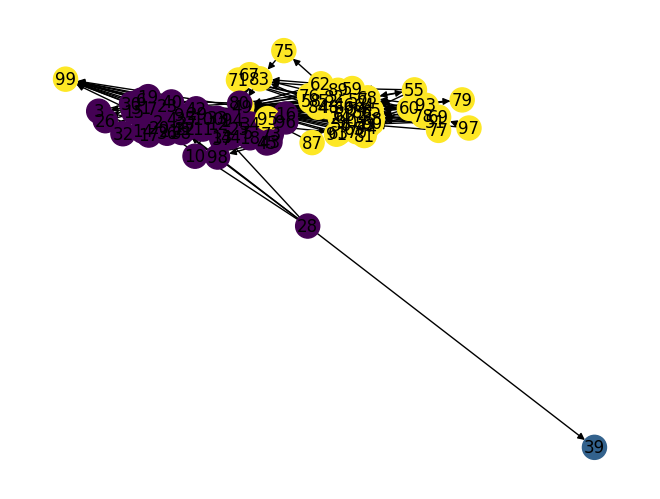

In [30]:
# Color graph based on labels
G = nx.DiGraph()

G.add_edges_from(log_data['user_links'])

labels = {node: node_data['label'] for node, node_data in nodes.items()}
colors = {node: node_data['label'] for node, node_data in nodes.items()}

print(colors)

nx.draw(G, with_labels=True, node_color=[colors[node] for node in G.nodes()])
plt.show()

In [31]:
for user in log_data['users']:
    user['label'] = nodes[user['identifier']]['label']

    print(user['persona']['party'], user['label'])

Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 8
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 99
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 39
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Democrat 12
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99
Republican 12
Republican 99
Republican 99
Republican 99
Republican 99
Republican 99

In [32]:
EL = 0
IL = 0

for user_link in log_data['user_links']:
    
    user_from = [user for user in log_data['users'] if user['identifier'] == user_link[0]][0]
    user_to = [user for user in log_data['users'] if user['identifier'] == user_link[1]][0]

    if user_from['persona']['party'] == user_to['persona']['party']:
        IL += 1
    else:
        EL += 1

EI_index = (EL - IL) / (EL + IL)

print(EI_index)


-0.6470588235294118


In [34]:
max_EI_index = 0
max_round = 0

for i, network_snapshot in enumerate(log_data['network_snapshots'], start=1):

    # G = nx.DiGraph()

    # G.add_edges_from(network_snapshot['connections'])

    IL = 0
    EL = 0

    for user_link in network_snapshot['connections']:
    
        user_from = [user for user in log_data['users'] if user['identifier'] == user_link[0]][0]
        user_to = [user for user in log_data['users'] if user['identifier'] == user_link[1]][0]

        if user_from['persona']['party'] == user_to['persona']['party']:
            IL += 1
        else:
            EL += 1

    if EL + IL > 0:
        EI_index = (EL - IL) / (EL + IL)
    else:
        EI_index = 0

    if EI_index < max_EI_index:
        max_EI_index = EI_index
        max_round = i

    print(f"Round {i}: {EI_index}")

print(max_EI_index, max_round)

Round 1: 0
Round 2: 0
Round 3: 0
Round 4: 0
Round 5: 0
Round 6: 0
Round 7: 0
Round 8: 0
Round 9: 0
Round 10: 0
Round 11: 0
Round 12: 0
Round 13: 0
Round 14: 0
Round 15: -1.0
Round 16: -1.0
Round 17: -1.0
Round 18: -1.0
Round 19: -1.0
Round 20: -1.0
Round 21: -1.0
Round 22: -1.0
Round 23: -1.0
Round 24: -1.0
Round 25: -1.0
Round 26: -1.0
Round 27: -1.0
Round 28: -1.0
Round 29: -1.0
Round 30: -1.0
Round 31: -1.0
Round 32: -0.3333333333333333
Round 33: -0.3333333333333333
Round 34: 0.0
Round 35: 0.0
Round 36: 0.0
Round 37: 0.0
Round 38: 0.0
Round 39: 0.0
Round 40: 0.0
Round 41: 0.0
Round 42: 0.2
Round 43: 0.2
Round 44: 0.2
Round 45: 0.2
Round 46: 0.2
Round 47: 0.2
Round 48: 0.2
Round 49: 0.2
Round 50: 0.2
Round 51: 0.2
Round 52: 0.0
Round 53: 0.0
Round 54: 0.14285714285714285
Round 55: 0.14285714285714285
Round 56: 0.25
Round 57: 0.25
Round 58: 0.25
Round 59: 0.1111111111111111
Round 60: 0.0
Round 61: 0.0
Round 62: 0.0
Round 63: 0.0
Round 64: 0.0
Round 65: 0.09090909090909091
Round 66: 0.